#### Scholarship Prediction API – Project Overview
##### 1)Collected and preprocessed student data relevant to scholarship eligibility (e.g., countries, departments, exam scores).
##### 2)Performed exploratory data analysis (EDA) to identify key factors influencing scholarship selection.
##### 3)Built a classification model using Random Forest Classifier from Scikit-learn to classify student eligibility for scholarships.
##### 4)Achieved an overall model accuracy of 90% on the test dataset.
##### 5)Serialized the trained model using joblib for integration into the API.
##### 6) Developed a FastAPI endpoint to handle real-time predictions via HTTP requests.
##### 7)Used Pydantic for request data validation to ensure robustness and type safety.


In [57]:
import pandas as pd
data = pd.read_csv("erasmus.csv")
data.shape

(341, 7)

In [58]:
data.head()

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [59]:
data.columns

Index(['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS',
       'EXAM SCORE', 'GRANT'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


In [61]:
data.isna().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64

In [62]:
data.dropna(inplace=True)

In [63]:
data.isna().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     0
EXAM SCORE      0
GRANT           0
dtype: int64

In [64]:
data.duplicated().sum()

0

#### Capitalizing the names of the columns

In [65]:
type(data.columns[0])

str

In [66]:
data.columns[0].capitalize()

'Index'

In [67]:
data.columns                                             # no changes in original dataset 

Index(['INDEX', 'COUNTRIES', 'UNIVERSITIES', 'FACULTIES', 'DEPARTMENTS',
       'EXAM SCORE', 'GRANT'],
      dtype='object')

In [68]:
new_columns_names=[]
for element in data.columns:
    new_columns_names.append(element.capitalize())
new_columns_names

['Index',
 'Countries',
 'Universities',
 'Faculties',
 'Departments',
 'Exam score',
 'Grant']

In [69]:
data.columns= new_columns_names                          # for changing the original dataset

In [70]:
data.head()

,Index,Countries,Universities,Faculties,Departments,Exam score,Grant
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


#### Dropping the columns

In [71]:
data.drop(columns=["Index"],inplace=True)
data.head()

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [72]:
data["Grant"].value_counts()

Grant
0    191
1    148
Name: count, dtype: int64

In [73]:
data["Exam score"].describe()

count    339.000000
mean      79.159853
std        8.585522
min       51.400000
25%       73.560000
50%       79.320000
75%       85.325000
max       98.500000
Name: Exam score, dtype: float64

#### Capitalizing the names in the columns

In [74]:
data["Countries"][0].capitalize()

'Italia'

In [75]:
data["Countries"].apply(lambda x: x.capitalize())

0       Italia
1       Italia
2       German
3       German
4       Italia
        ...   
336      Dutch
337     Poland
338    Belgium
339      Dutch
340     German
Name: Countries, Length: 339, dtype: object

In [77]:
data["Countries"]= data["Countries"].apply(lambda x: x.capitalize())
data.head()

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,Italia,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,German,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,German,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


#### Grouping the columns & Plotting the data

In [ ]:
data.groupby("Countries")["Exam score"].mean().sort_values(ascending=False)

In [79]:
import matplotlib.pyplot as plt

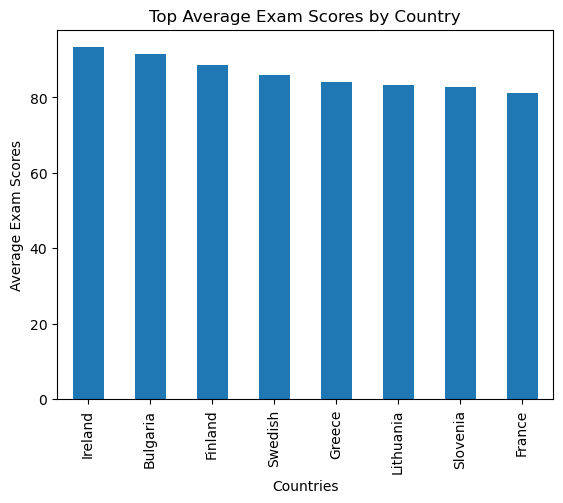

In [80]:
data.groupby("Countries")["Exam score"].mean().sort_values(ascending=False).head(8).plot(kind="bar")
plt.ylabel("Average Exam Scores")
plt.title("Top Average Exam Scores by Country")
plt.show()

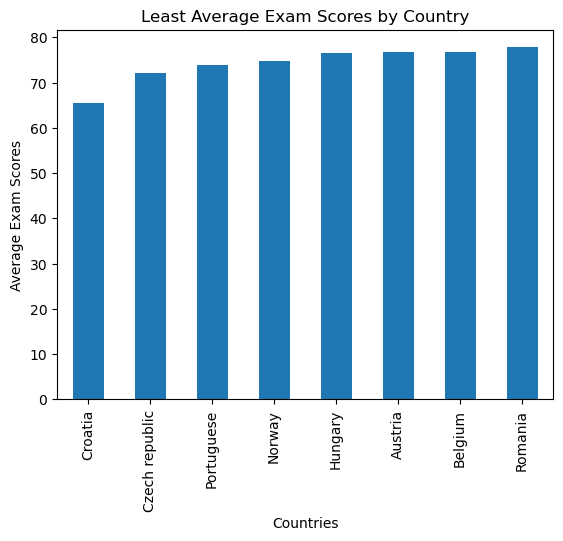

In [81]:
data.groupby("Countries")["Exam score"].mean().sort_values(ascending=True).head(8).plot(kind="bar")
plt.ylabel("Average Exam Scores")
plt.title("Least Average Exam Scores by Country")
plt.show()

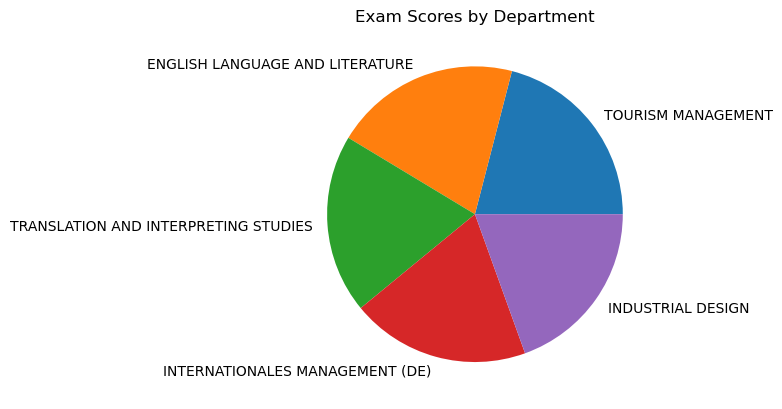

In [82]:
data.groupby("Departments")["Exam score"].mean().sort_values(ascending=False).head(5).plot(kind="pie")
plt.ylabel("")
plt.title("Exam Scores by Department")
plt.show()

In [83]:
data.head()

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,Italia,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,German,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,German,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [84]:
data.groupby(["Countries","Grant"])["Exam score"].mean().reset_index()

,Countries,Grant,Exam score
0,Austria,0,71.373333
1,Austria,1,88.692500
2,Belgium,0,71.215714
3,Belgium,1,83.465000
4,Bulgaria,1,91.500000
5,Croatia,0,65.533333
6,Czech republic,0,72.192500
7,Denmark,0,75.910000
8,Denmark,1,83.210000
9,Dutch,0,73.548529


In [86]:
groupeddata= data.groupby(["Countries","Grant"])["Exam score"].mean().reset_index()
groupeddata[groupeddata["Countries"]=="Spain"]

,Countries,Grant,Exam score
35,Spain,0,73.701538
36,Spain,1,85.328462


#### Feature Engineering of the data

In [87]:
data.head()

,Countries,Universities,Faculties,Departments,Exam score,Grant
0,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,Italia,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,German,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,German,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,Italia,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [88]:
X= data[["Countries","Departments","Exam score"]]
y= data[["Grant"]]

In [89]:
X

,Countries,Departments,Exam score
0,Italia,ENGLISH LANGUAGE AND LITERATURE,98.50
1,Italia,SOCIOLOGY,97.10
2,German,PSYCHOLOGY,96.80
3,German,NUTRITION AND DIETETICS,96.50
4,Italia,ENGLISH LANGUAGE AND LITERATURE,96.32
...,...,...,...
336,Dutch,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13
337,Poland,CIVIL ENGINEERING,61.63
338,Belgium,INTERNATIONAL FINANCE,59.93
339,Dutch,ADVERTISING DESIGN AND COMMUNICATION,56.58


##### Encoding the data

In [90]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()                                    

In [ ]:
X["Countries"]= labelencoder.fit_transform(data["Countries"])

In [92]:
X

,Countries,Departments,Exam score
0,13,ENGLISH LANGUAGE AND LITERATURE,98.50
1,13,SOCIOLOGY,97.10
2,9,PSYCHOLOGY,96.80
3,9,NUTRITION AND DIETETICS,96.50
4,13,ENGLISH LANGUAGE AND LITERATURE,96.32
...,...,...,...
336,6,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,62.13
337,16,CIVIL ENGINEERING,61.63
338,1,INTERNATIONAL FINANCE,59.93
339,6,ADVERTISING DESIGN AND COMMUNICATION,56.58


In [93]:
labelencoder.classes_

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech republic',
       'Denmark', 'Dutch', 'Finland', 'France', 'German', 'Greece',
       'Hungary', 'Ireland', 'Italia', 'Lithuania', 'Norway', 'Poland',
       'Portuguese', 'Romania', 'Slovenia', 'Spain', 'Swedish'],
      dtype=object)

In [95]:
X["Departments"]=labelencoder.fit_transform(X["Departments"])

C:\Users\hp\AppData\Local\Temp\ipykernel_7844\615313650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Departments"]=labelencoder.fit_transform(X["Departments"])


In [96]:
X

,Countries,Departments,Exam score
0,13,12,98.50
1,13,48,97.10
2,9,44,96.80
3,9,35,96.50
4,13,12,96.32
...,...,...,...
336,6,41,62.13
337,16,6,61.63
338,1,24,59.93
339,6,0,56.58


In [97]:
labelencoder.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [98]:
X

,Countries,Departments,Exam score
0,13,12,98.50
1,13,48,97.10
2,9,44,96.80
3,9,35,96.50
4,13,12,96.32
...,...,...,...
336,6,41,62.13
337,16,6,61.63
338,1,24,59.93
339,6,0,56.58


In [99]:
y

,Grant
0,1
1,1
2,1
3,1
4,1
...,...
336,0
337,0
338,0
339,0


#### Train Test Split

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

##### 1) Logistic Regression based model training

In [107]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)                                  # Erroe because of 1-D array

In [109]:
log_model.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [110]:
log_model_predictions=log_model.predict(X_test)

In [111]:
log_model_predictions

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

In [ ]:
accuracy_score(y_test,log_model_predictions)                                  # Model prediction

0.8970588235294118

##### 2) Support Vector Classifier based model training

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm=SVC()

In [117]:
param_grid_svc={"C":[0.01,0.1,0.5,1],"kernel":["Linear","rbf","poly"]}
gridsvc = GridSearchCV(svm,param_grid_svc)

In [ ]:
gridsvc.fit(X_train,y_train.values.ravel())

In [119]:
gridsvc.best_params_

{'C': 0.5, 'kernel': 'poly'}

In [128]:
gridsvc.best_estimator_

SVC(C=0.5, kernel='poly')

In [129]:
svc_prediction=gridsvc.predict(X_test)

In [ ]:
accuracy_score(y_test,svc_prediction)                    # Model Accuracy Score

0.8823529411764706

##### 3) Random Forest Classifier based model training

In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
n_estimators=[32,64,128,256]
max_features=[2,3,4]
param_grid_rfc={"n_estimators":n_estimators,"max_features":max_features}

In [132]:
grid_rfc=GridSearchCV(rfc_model,param_grid_rfc)

In [133]:
grid_rfc.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [134]:
grid_rfc.best_params_

{'max_features': 4, 'n_estimators': 256}

In [135]:
rfc_predictions=grid_rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,rfc_predictions)                    # Accuracy of the model

0.8970588235294118

##### From the above observation we saw that Linear and RFC both have same Accuracy. So, choose anyone I choose RFC model 

In [137]:
grid_rfc.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=256)

In [138]:
import joblib
joblib.dump(grid_rfc.best_estimator_,"model.pkl")

['model.pkl']

In [140]:
X.columns

Index(['Countries', 'Departments', 'Exam score'], dtype='object')